<a href="https://colab.research.google.com/github/anejaprerna19/Test_/blob/main/Heart_Disease_Classification_STP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving heart.csv to heart (1).csv


### Introduction
The objective of this notebook is the classification of heart diseases i.e. classify whether the person has heart disease or not. The dataset has been downloaded from Kaggle. You can view it here :https://www.kaggle.com/ronitf/heart-disease-uci

In [ ]:
# Standard imports :
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Let us see how our data looks. We need to import our dataset into a dataframe and for this we will use pandas 

In [ ]:
heart_disease=pd.read_csv('heart.csv')

In [ ]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# Preprocessing the data.
heart_disease['age'].fillna(heart_disease['age'].mean(), inplace=True)              # provides mean wherever value is missing
heart_disease['sex'].fillna(0, inplace=True)
heart_disease['trestbps'].fillna(heart_disease['trestbps'].mean(), inplace=True)
heart_disease['oldpeak'].fillna(heart_disease['oldpeak'].mean(), inplace=True)

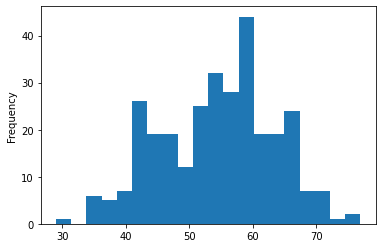

In [ ]:
# let us see the most of our data lies in which age set 
heart_disease['age'].plot.hist(bins=20)

In [ ]:
# Let us find out the % of patients with or without heart problems
target_temp= heart_disease.target.value_counts()
print('Percentage of patients without heart problem :'+str(round(target_temp[0]*100/303,2)))
print('Percentage of patients with heart problem :'+str(round(target_temp[1]*100/303,2)))

Percentage of patients without heart problem :45.54
Percentage of patients with heart problem :54.46


In [ ]:
# Concentrating our calculations and predictions in the age group over 50
over_50= heart_disease[heart_disease['age']>50]
over_50.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


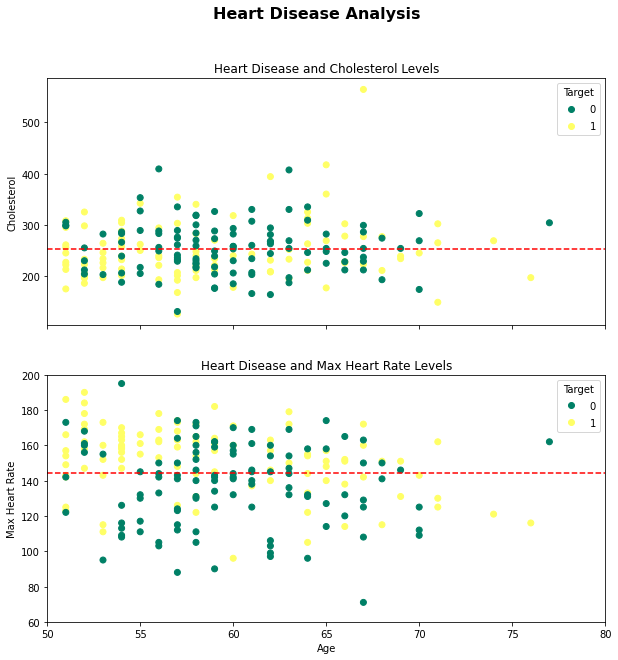

In [ ]:
# Let us analyze our dataset in the form of chart to see how cholestrol levels and max heart rate varies according to age :
fig,(ax0,ax1)=plt.subplots(nrows=2,ncols=1,sharex=True, figsize=(10,10))

scatter=ax0.scatter(over_50['age'],
                   over_50['chol'],
                   c=over_50['target'],
                    cmap='summer')
ax0.set(title='Heart Disease and Cholesterol Levels',
       ylabel='Cholesterol')

# Setup the x axis
ax0.set_xlim([50,80])
ax0.axhline(y=over_50["chol"].mean(),
           color='r',
           ls='--',
           label='Average');

ax0.legend(*scatter.legend_elements(), title='Target')

# Axis 1,1 (row 1, column 1)
scatter = ax1.scatter(over_50["age"], 
                      over_50["thalach"], 
                      c=over_50["target"],
                      cmap='summer')
ax1.set(title="Heart Disease and Max Heart Rate Levels",
        xlabel="Age",
        ylabel="Max Heart Rate")

# Set the y axis
ax1.set_ylim([60, 200])

# Setup a mean line
ax1.axhline(y=over_50["thalach"].mean(), 
            color='r', 
            ls='--', 
            label="Average");
ax1.legend(*scatter.legend_elements(), title="Target")

# Title the figure
fig.suptitle('Heart Disease Analysis', fontsize=16, fontweight='bold');

In [ ]:
# Getting the data ready to train :
# Splitting the data into features and target
X=heart_disease.drop('target',axis=1)
y=heart_disease['target']
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [ ]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [ ]:
# Splitting the data into testing and training sets 80% data will be trained and model will be tested on 20% of the remaining data :
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [ ]:
# Creating a list for storing accuracy and another list for the models so that we can compare accuracies at the end.
acc=[]
model=[]

## 1. LinearSVC

In [ ]:
#Import LinearSVC from the svm module
from sklearn.svm import LinearSVC
np.random.seed(42)
clf= LinearSVC(max_iter=1000)
# Instantiate and fit the model on the training set
clf.fit(X_train, y_train)
# Checking the score on test set.
x=clf.score(X_test,y_test)
model.append("LinearSVC")
acc.append(x)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


## 2. Random Forest Classifier


In [ ]:
# Import the RandomForestClassifier model class from the ensemble module
from sklearn.ensemble import RandomForestClassifier
np.random.seed(40)
# Instantiate and fit the model (on the training set)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Check the score of the model (on the test set)
x=clf.score(X_test, y_test)
y_preds=clf.predict(X_test)
model.append("Random Forest")
acc.append(x)

## 3. K Nearest Neighbors

In [ ]:
# Applying K-Nearest Neighbors
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

knn.fit(X_train,y_train)
x= knn.score(X_test, y_test)
acc.append(x)

model.append('K Nearest Neighbours')

In [ ]:
acc

[0.45901639344262296, 0.7377049180327869, 0.6721311475409836]

## 4. Logistic Regression

In [ ]:
# Applying Logistic Regression
from sklearn.linear_model import LogisticRegression     
logreg = LogisticRegression(max_iter=1000)

logreg.fit(X_train, y_train)
x= logreg.score(X_test, y_test)
acc.append(x)

model.append('Logistic Regression')

In [ ]:
from sklearn.metrics import roc_curve

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

# Keep the probabilites of the positive class only
y_probs = y_probs[:, 1]

# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Check the false positive rate - A false positive is an outcome where the model incorrectly predicts the positive class.
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.07142857, 0.07142857, 0.07142857, 0.07142857, 0.10714286,
       0.10714286, 0.17857143, 0.17857143, 0.25      , 0.28571429,
       0.32142857, 0.35714286, 0.35714286, 0.39285714, 0.39285714,
       0.42857143, 0.42857143, 0.46428571, 0.5       , 0.5       ,
       0.53571429, 0.67857143, 0.82142857, 0.82142857, 1.        ])

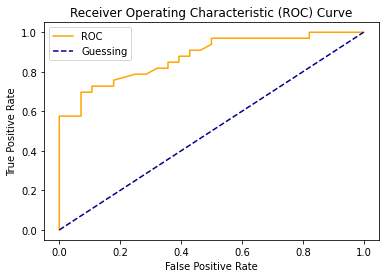

In [ ]:
# ROC Curve Visually
# ROC (receiver operating charateristic curve) is is a graph showing the performance of a classification model at all classification thresholds
import matplotlib.pyplot as plt
%matplotlib inline
def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positve rate (fpr) and 
    true postive rate (tpr) of a classifier.
    """
    # Plot ROC curve
    plt.plot(fpr, tpr, color='orange', label='ROC')
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Guessing')
    # Customize the plot
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs)

0.8766233766233766

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.77      0.61      0.68        28
           1       0.72      0.85      0.78        33

    accuracy                           0.74        61
   macro avg       0.75      0.73      0.73        61
weighted avg       0.74      0.74      0.73        61



In [ ]:
# Perfect ROC AUC score
roc_auc_score(y_test, y_test)

1.0

In [ ]:
from sklearn.model_selection import cross_val_score
score= cross_val_score(clf, X, y, cv=5)
print('Cross validation score is ',score)


Cross validation score is  [0.80327869 0.83606557 0.78688525 0.81666667 0.76666667]


In [ ]:
print(model)
print(acc)

['LinearSVC', 'Random Forest', 'K Nearest Neighbours', 'Logistic Regression']
[0.45901639344262296, 0.7377049180327869, 0.6721311475409836, 0.8032786885245902]


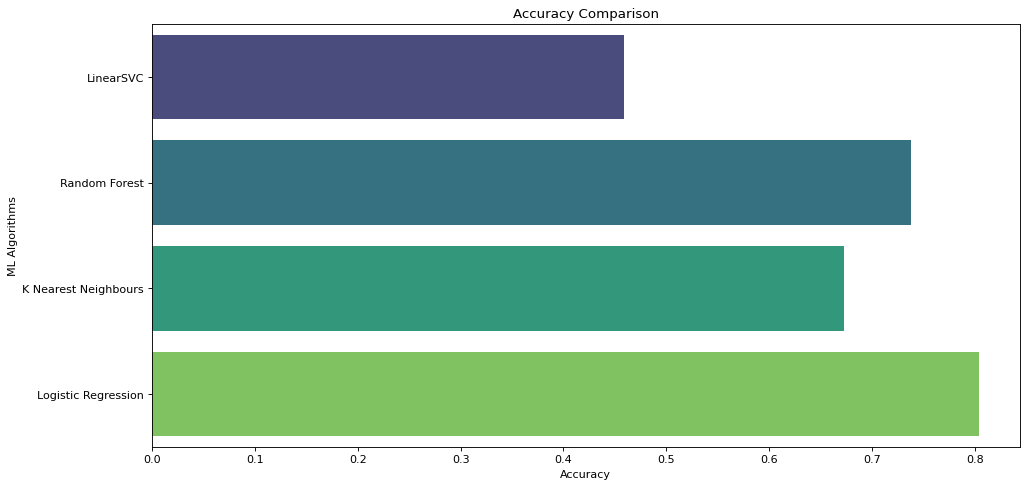

In [ ]:
import seaborn as sns
plt.figure(figsize=[14,7],dpi = 80, facecolor='white')
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('ML Algorithms')
sns.barplot(x = acc,y = model,palette='viridis')
plt.savefig('plot.png', dpi=300, bbox_inches='tight')

In [ ]:
# Random forest gives the best accuracy (80%), using it for classification.

In [ ]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

## Building a predictive system ⚛


In [ ]:
input_data = (57,1,1,124,261,0,1,141,0,0.3,2,0,3)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = clf.predict(input_data_reshaped)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

The Person does not have a Heart Disease


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
# print("Enter age	sex	cp trestbps	chol	fbs	restecg	thalach	exang	oldpeak	slope	ca	thal")
# str = input()
# arr = list(map(int, string.split(' ')))

In [ ]:
# plot_roc_curve(fpr, tpr)

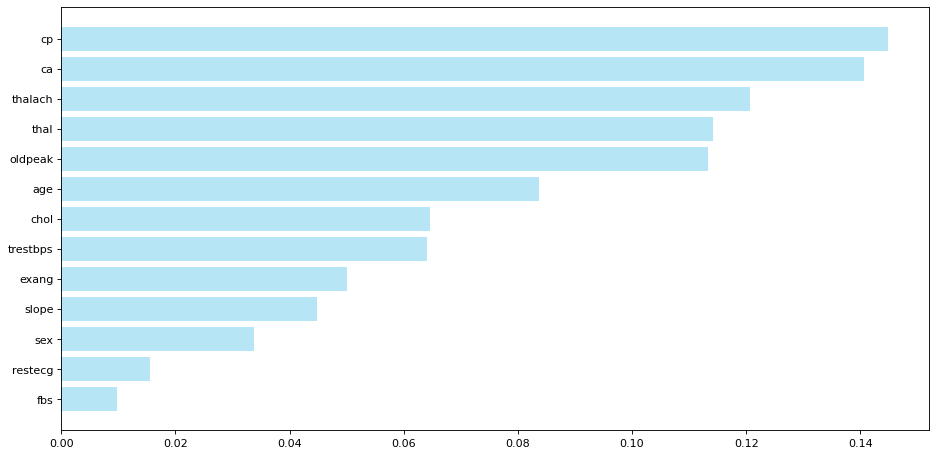

In [ ]:
plt.figure(figsize=[14,7],dpi = 80, facecolor='white')
f_i = list(zip(X,clf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i],color='#B6E6F5')
plt.show()